In [1]:
# Self Organizing Map

# Importing the libraries
from minisom import MiniSom
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
base = pd.read_csv('credit-data.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92

X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [4]:
# Training the SOM
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

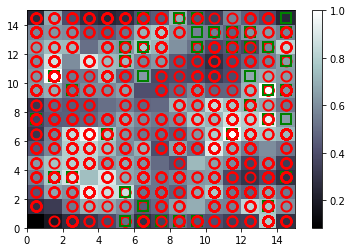

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [6]:
# Finding the defaulters
mappings = som.win_map(X)
suspeitos = np.concatenate((mappings[(13,9)], mappings[(1,10)]), axis = 0)
suspeitos = normalizador.inverse_transform(suspeitos)

In [7]:
# Print suspeitos
suspeitos

array([[5.00000000e+00, 6.69526888e+04, 1.85843359e+01, 8.77009924e+03],
       [7.20000000e+01, 3.85649321e+04, 2.12164917e+01, 5.60416999e+03],
       [8.60000000e+01, 4.49303942e+04, 1.97773858e+01, 7.70831562e+03],
       [8.80000000e+01, 2.76129148e+04, 1.92124482e+01, 1.51362420e+03],
       [9.90000000e+01, 5.36018124e+04, 2.02406213e+01, 9.60137548e+03],
       [1.41000000e+02, 4.53414746e+04, 2.25695684e+01, 6.52521842e+03],
       [1.80000000e+02, 3.86256320e+04, 1.96300378e+01, 5.83656338e+03],
       [1.85000000e+02, 6.11677748e+04, 2.05836314e+01, 1.03966181e+04],
       [1.86000000e+02, 6.46196646e+04, 2.60420927e+01, 9.70478241e+03],
       [2.26000000e+02, 5.81216686e+04, 2.73018002e+01, 7.53110125e+03],
       [2.29000000e+02, 6.47809385e+04, 2.02281012e+01, 8.40241559e+03],
       [2.30000000e+02, 6.55884034e+04, 2.29182123e+01, 7.87973814e+03],
       [2.36000000e+02, 5.62671716e+04, 2.24861360e+01, 7.32924316e+03],
       [2.76000000e+02, 6.22885396e+04, 2.56021726e